In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
optimum = {}

best = pd.read_csv('data/find_best.csv')
for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    optimum[(int(size),bool(pin))] = int(best_row['threads'])

print(optimum)

{(500, False): 16, (500, True): 16, (550, False): 16, (550, True): 16, (600, False): 16, (600, True): 16, (650, False): 15, (650, True): 16, (700, False): 15, (700, True): 16, (750, False): 15, (750, True): 16, (800, False): 16, (800, True): 16, (850, False): 14, (850, True): 15, (900, False): 16, (900, True): 16, (950, False): 16, (950, True): 15, (1000, False): 16, (1000, True): 16, (1050, False): 16, (1050, True): 16, (1100, False): 8, (1100, True): 12, (1150, False): 15, (1150, True): 14, (1200, False): 9, (1200, True): 12, (1250, False): 8, (1250, True): 12, (1500, False): 8, (1500, True): 12, (1750, False): 8, (1750, True): 12, (2000, False): 8, (2000, True): 12, (2250, False): 8, (2250, True): 12, (2500, False): 8, (2500, True): 12}


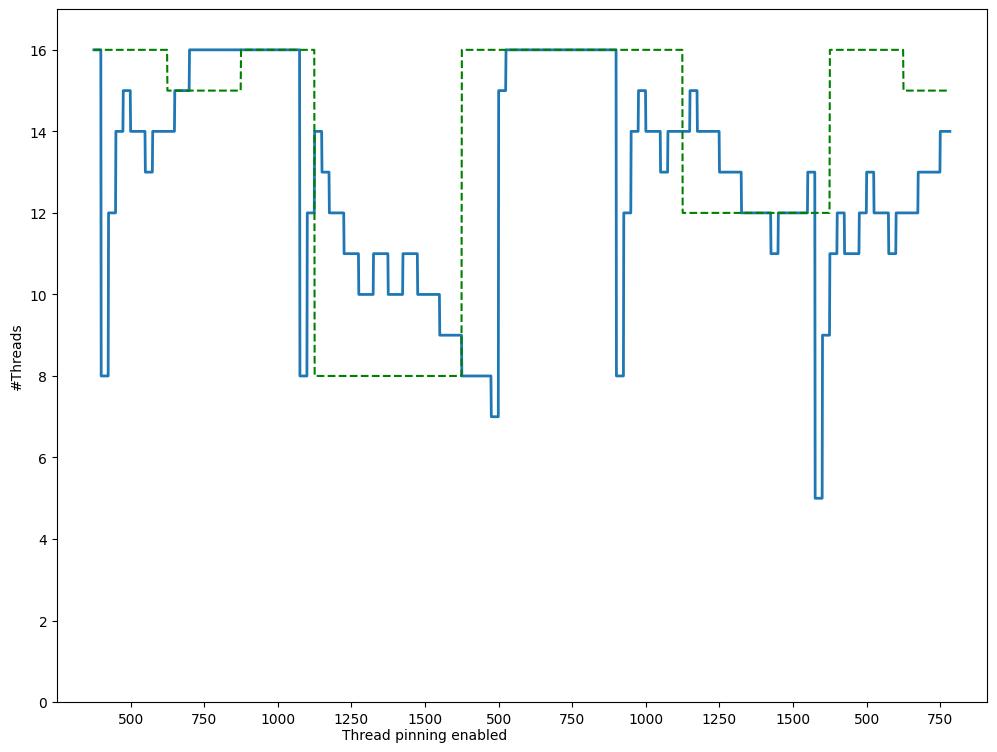

Average distance from optimum: 2.1517


In [100]:
fast = pd.read_csv('data/adapt_fast.csv')
fast['optimum'] = fast.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)

fig = plt.figure(figsize=(12,9))
fig.tight_layout()

x = fast.index

ax = sns.lineplot(x=x, y=fast['threads'], linewidth=2)
sns.lineplot(x=x, y=fast['optimum'], color='g', linestyle='--', ax=ax)

xticks = list(range(100, len(fast), 200))
xlabels = [f'{'' if i % 2 == 0 else ''}{fast['size'][x]}' for i, x in enumerate(xticks)]
if len(xlabels) > 4:
    xlabels[4] += '\nThread pinning enabled'
if len(xlabels) > 14:
    xlabels[14] += '\nThread pinning disabled'
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('')
ax.set_ylabel('#Threads')
ax.set_xlim((-100,len(fast)+100))
ax.set_ylim((0,17))

fig.savefig('images/adapt_fast.png', bbox_inches='tight')
plt.show()

dist = (fast['threads'] - fast['optimum']).abs()
print(f'Average distance from optimum: {dist.sum() / len(dist):.4f}')

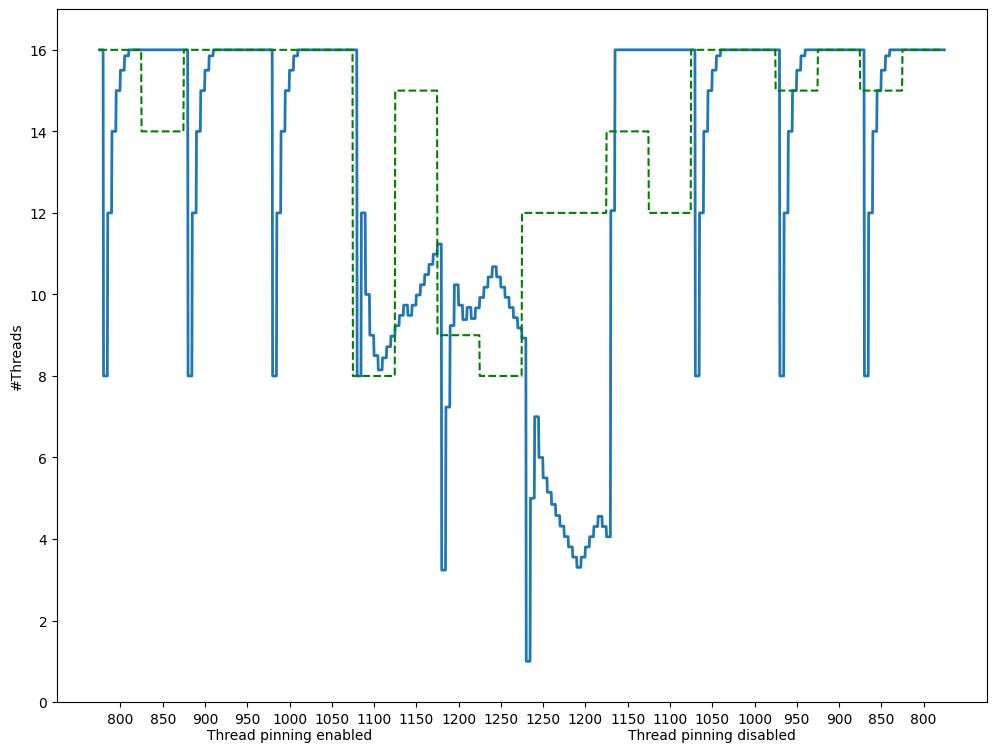

Average distance from optimum: 2.1669


In [109]:
slow = pd.read_csv('data/adapt_slow.csv')
slow['optimum'] = slow.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)

fig = plt.figure(figsize=(12,9))
fig.tight_layout()

x = slow.index

ax = sns.lineplot(x=x, y=slow['threads'], linewidth=2)
sns.lineplot(x=x, y=slow['optimum'], color='g', linestyle='--', ax=ax)

xticks = list(range(50, len(slow), 100))
xlabels = [f'{'' if i % 2 == 0 else ''}{slow['size'][x]}' for i, x in enumerate(xticks)]
if len(xlabels) > 4:
    xlabels[4] += '\nThread pinning enabled'
if len(xlabels) > 14:
    xlabels[14] += '\nThread pinning disabled'
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('')
ax.set_ylabel('#Threads')
ax.set_xlim((-100,len(slow)+100))
ax.set_ylim((0,17))

fig.savefig('images/adapt_slow.png', bbox_inches='tight')
plt.show()

dist = (slow['threads'] - slow['optimum']).abs()
print(f'Average distance from optimum: {dist.sum() / len(dist):.4f}')